In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train = X_train / 255
X_test = X_test / 255

array([[[0.28627451, 0.30196078, 0.22745098],
        [0.27843137, 0.26666667, 0.19607843],
        [0.30196078, 0.27058824, 0.17254902],
        ...,
        [0.71764706, 0.82352941, 0.58431373],
        [0.70588235, 0.83921569, 0.56078431],
        [0.7254902 , 0.88235294, 0.56470588]],

       [[0.28627451, 0.29019608, 0.20392157],
        [0.29411765, 0.26666667, 0.21568627],
        [0.30588235, 0.25098039, 0.19607843],
        ...,
        [0.70980392, 0.89803922, 0.54509804],
        [0.6745098 , 0.8627451 , 0.50588235],
        [0.68235294, 0.85490196, 0.49803922]],

       [[0.30196078, 0.28235294, 0.25098039],
        [0.36862745, 0.32156863, 0.30980392],
        [0.38823529, 0.31764706, 0.28627451],
        ...,
        [0.68627451, 0.83529412, 0.54509804],
        [0.74901961, 0.90196078, 0.59607843],
        [0.7254902 , 0.88627451, 0.55686275]],

       ...,

       [[0.32941176, 0.41568627, 0.21960784],
        [0.3372549 , 0.41176471, 0.22745098],
        [0.4627451 , 0

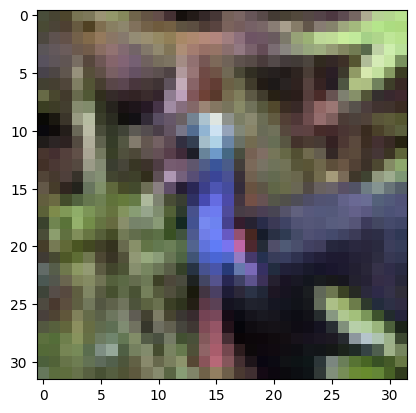

<Figure size 1000x1000 with 0 Axes>

In [4]:
plt.imshow(X_train[24])
plt.figure(figsize = (10,10))
X_train[24]

In [5]:
from keras import Sequential
from keras.layers import Dense
ANN = Sequential([
    keras.layers.Flatten (input_shape = (32,32,3)),
    Dense(30,activation = 'relu'),
    Dense(30,activation = 'softmax'),
    Dense(10,activation = 'sigmoid')
])

ANN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

C:\Users\avina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
ANN.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1735 - loss: 2.1966
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2525 - loss: 2.0248
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2919 - loss: 1.9312
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3103 - loss: 1.8769
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3206 - loss: 1.8467
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3363 - loss: 1.8267
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3436 - loss: 1.8018
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3507 - loss: 1.7864
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3558 - loss: 1.7683
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3645 - loss: 1.7575


In [7]:
y_pred = ANN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


In [8]:
y_pred[28].argmax()
classes = [' airplanes',' cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
# print("Actual Class :", classes[y_test[25]])
classes[y_pred[28].argmax()]

' cars'

In [9]:
# CNN Implementation
from keras import Sequential
CNN = Sequential([
    layers.Conv2D(filters = 30 , kernel_size = (3,3), activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])
CNN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

C:\Users\avina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
CNN.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8107 - loss: 0.5408
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8196 - loss: 0.5127
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8308 - loss: 0.4806
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8454 - loss: 0.4402
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8554 - loss: 0.4142


In [14]:
y_pred = CNN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


predicted Class : ships
Actual Class: ships


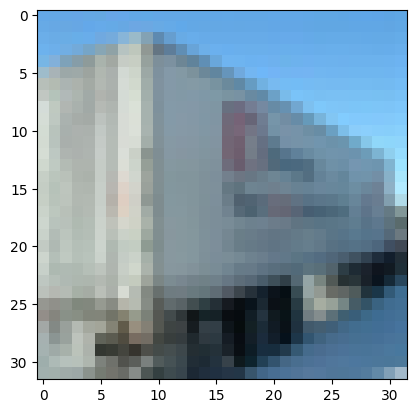

In [42]:
print("predicted Class : " + classes[y_pred[15].argmax()])
print("Actual Class: " + classes[int(y_test[15])])
plt.imshow(X_train[15])